In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/_cafe_sales.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [7]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [12]:
print(df.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [15]:
# ist we convert type because all in object and we cannot caluculate on object type and for date and time we set date data type
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('Int64')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce').astype('float')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce').astype('float')

# Convert date column
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [16]:
df['Item'] = df['Item'].fillna('Unknown') # data is categorical so we replace it with unknown new category
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())
df['Total Spent'] = df['Quantity'] * df['Price Per Unit']
df['Payment Method'] = df['Payment Method'].fillna('Unknown')
df = df.drop(columns=['Location']) # drop column because more than 30% missing
df = df.dropna(subset=['Transaction Date']) # drop row because it less than 2% save to drop


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              9540 non-null   object        
 2   Quantity          9540 non-null   Int64         
 3   Price Per Unit    9540 non-null   float64       
 4   Total Spent       9540 non-null   Float64       
 5   Payment Method    9540 non-null   object        
 6   Transaction Date  9540 non-null   datetime64[ns]
dtypes: Float64(1), Int64(1), datetime64[ns](1), float64(1), object(3)
memory usage: 614.9+ KB


In [18]:
print(df.isnull().sum())

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Transaction Date    0
dtype: int64


In [29]:
# Define function to detect outliers using IQR
lower =0
upper =0
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Detect outliers in 'Quantity'
outliers_quantity = detect_outliers_iqr(df, 'Quantity')
outliers_quantity

outliers_TotalSpent = detect_outliers_iqr(df, 'Total Spent')
outliers_TotalSpent



,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date
10,TXN_2548360,Salad,5,5.0,25.0,Cash,2023-11-07
51,TXN_6342161,Salad,5,5.0,25.0,ERROR,2023-01-08
52,TXN_8914892,UNKNOWN,5,5.0,25.0,Digital Wallet,2023-03-15
96,TXN_5220895,Salad,5,5.0,25.0,Cash,2023-06-10
100,TXN_9517146,Unknown,5,5.0,25.0,Cash,2023-10-30
...,...,...,...,...,...,...,...
9791,TXN_1232346,Salad,5,5.0,25.0,Digital Wallet,2023-01-04
9805,TXN_9506076,Salad,5,5.0,25.0,Unknown,2023-01-17
9879,TXN_6393305,Salad,5,5.0,25.0,Digital Wallet,2023-10-19
9908,TXN_8922585,Salad,5,5.0,25.0,Credit Card,2023-06-22


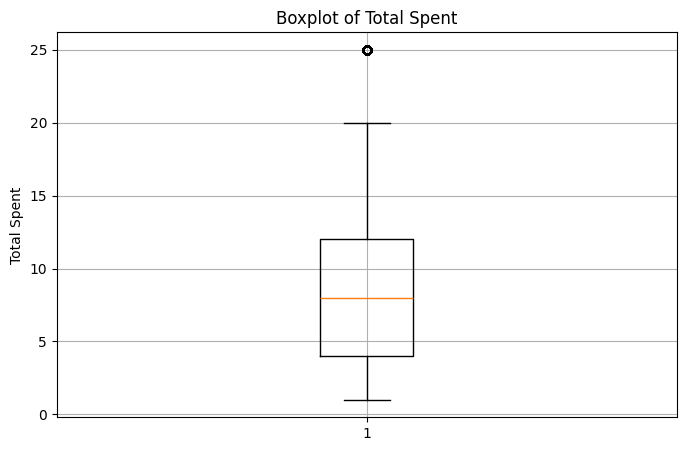

In [24]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['Total Spent'].dropna())
plt.title('Boxplot of Total Spent')
plt.ylabel('Total Spent')
plt.grid(True)
plt.show()

In [34]:
#  Calculate IQR
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# cap outlier with lower bound and upper bound
df['Total Spent'] = df['Total Spent'].clip(lower=lower_bound, upper=upper_bound)


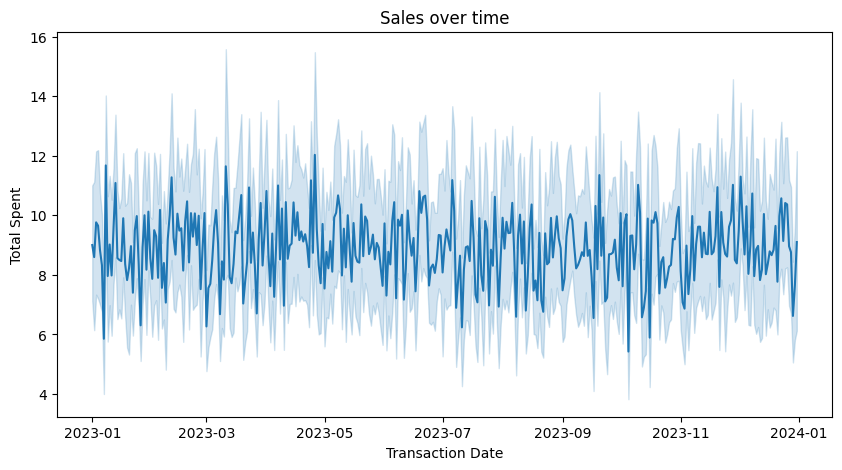

In [35]:
# line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Transaction Date', y='Total Spent', data=df)
plt.title('Sales over time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Spent')
plt.show()

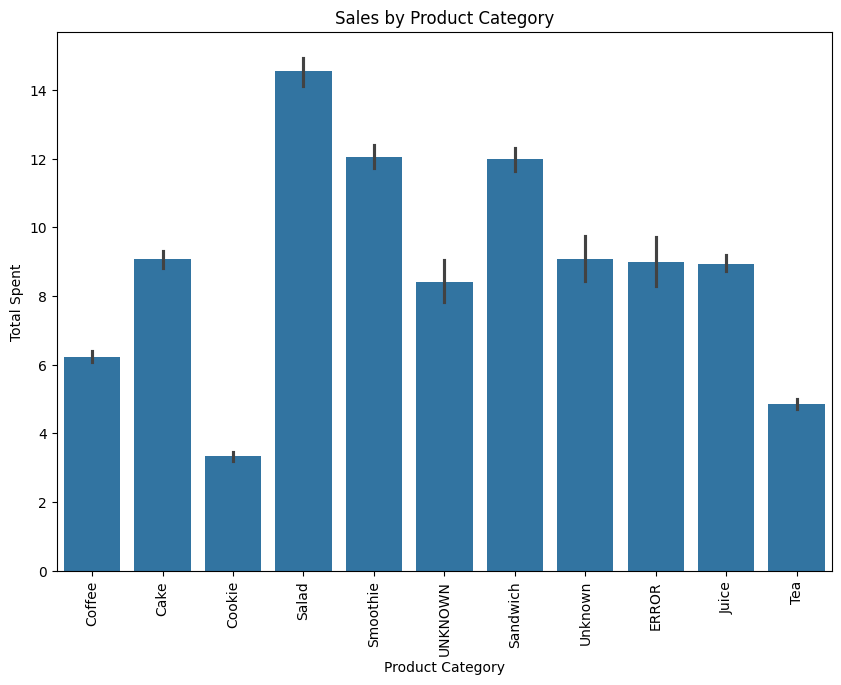

In [43]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Item', y='Total Spent', data=df)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spent')
plt.xticks(rotation=90)
plt.show()

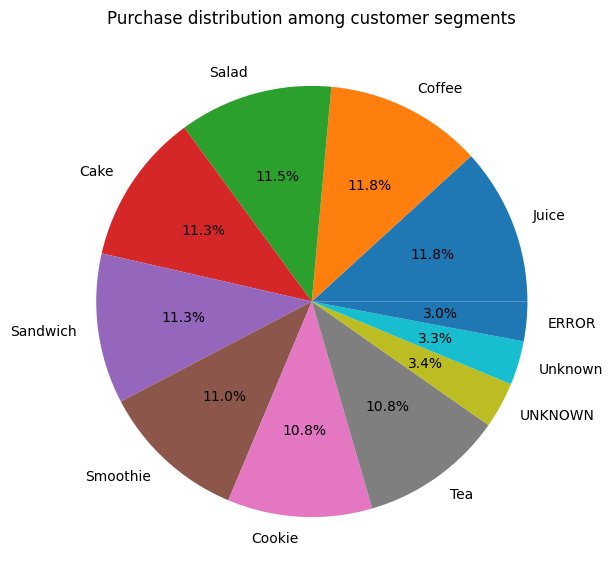

In [45]:
# pie chart
plt.figure(figsize=(10, 7))
df['Item'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Purchase distribution among customer segments')
plt.ylabel('')
plt.show()

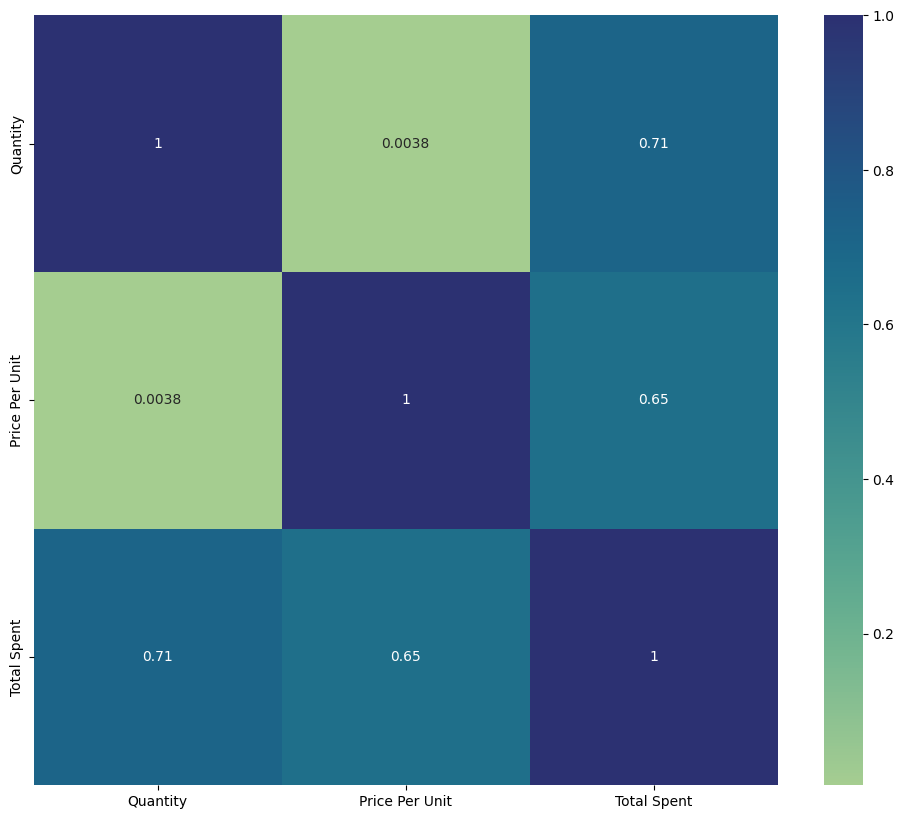

In [52]:
# Plot heatmap
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="crest")
plt.show()

In [54]:
df["Total_Sale"]=df['Price Per Unit']*df["Quantity"]
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date,Total_Sale
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,2023-09-08,4.0
1,TXN_4977031,Cake,4,3.0,12.0,Cash,2023-05-16,12.0
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,2023-07-19,4.0
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,2023-04-27,10.0
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,2023-06-11,4.0


In [56]:
# Convert Transaction Date to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Extract Day of Week (Monday=0, Sunday=6)
df['Day of Week'] = df['Transaction Date'].dt.dayofweek

# Extract Hour (since no time is provided, it will default to 00:00)
df['Hour'] = df['Transaction Date'].dt.hour

# Map day of week numbers to names for clarity
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day of Week Name'] = df['Day of Week'].map(day_map)

# Display the updated DataFrame
print(df[['Transaction Date', 'Day of Week', 'Day of Week Name', 'Hour']])

     Transaction Date  Day of Week Day of Week Name  Hour
0          2023-09-08            4           Friday     0
1          2023-05-16            1          Tuesday     0
2          2023-07-19            2        Wednesday     0
3          2023-04-27            3         Thursday     0
4          2023-06-11            6           Sunday     0
...               ...          ...              ...   ...
9995       2023-08-30            2        Wednesday     0
9996       2023-06-02            4           Friday     0
9997       2023-03-02            3         Thursday     0
9998       2023-12-02            5         Saturday     0
9999       2023-11-07            1          Tuesday     0

[9540 rows x 4 columns]


In [57]:
# Identify categorical columns
categorical_cols = ["Item", "Payment Method"]

# Apply one-hot encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the encoded DataFrame
print(df_encoded)

     Transaction ID  Quantity  Price Per Unit  Total Spent Transaction Date  \
0       TXN_1961373         2             2.0          4.0       2023-09-08   
1       TXN_4977031         4             3.0         12.0       2023-05-16   
2       TXN_4271903         4             1.0          4.0       2023-07-19   
3       TXN_7034554         2             5.0         10.0       2023-04-27   
4       TXN_3160411         2             2.0          4.0       2023-06-11   
...             ...       ...             ...          ...              ...   
9995    TXN_7672686         2             2.0          4.0       2023-08-30   
9996    TXN_9659401         3             3.0          9.0       2023-06-02   
9997    TXN_5255387         4             2.0          8.0       2023-03-02   
9998    TXN_7695629         3             3.0          9.0       2023-12-02   
9999    TXN_6170729         3             4.0         12.0       2023-11-07   

      Total_Sale  Day of Week  Hour Day of Week Nam

In [60]:
from google.colab import files
df.to_csv('cleaned_data.csv', index=False)
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>